# Least Squares Regression Problem

Given a set of independent data points $x_i$ and dependent data points $y_i$, $i=1,\ \ldots,\ m$, we would like to find an estimation function, $\hat{y}(x)$, that describes the data as well as possible. Note that $\hat{y}$ can be a function of several variables, but for the sake of this discussion, we restrict the domain of $\hat{y}$ to be a single variable.

## importing necessary libraries

In [23]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn')

## Direct Inverse Method

In [24]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

print(x)
print(y)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[1.         1.01566266 1.03454984 1.03835439 1.0483547  1.0934039
 1.09896819 1.13118834 1.08238282 1.14988752 1.11488895 1.12005504
 1.21130453 1.17257305 1.16973728 1.19620522 1.19140798 1.25172329
 1.27802926 1.24005614 1.25273862 1.41421221 1.32197701 1.27353246
 1.46065578 1.33378657 1.32057986 1.51624135 1.33834901 1.45221367
 1.55594136 1.49142158 1.62601217 1.56403609 1.53690977 1.64420187
 1.63888009 1.71706395 1.65054606 1.60093899 1.66823384 1.78818958
 1.57566504 1.6964

In [25]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [26]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.54103327]
 [0.99794659]]


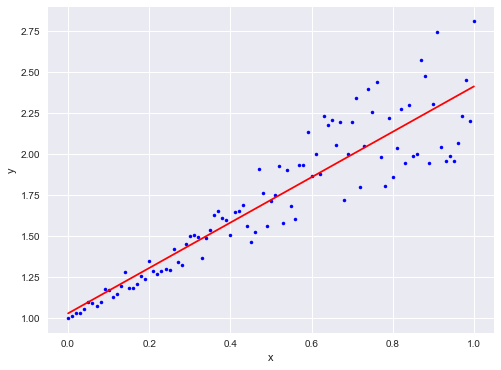

In [32]:
# plot the results
plt.figure(figsize = (8,6))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Use the pseudoinverse

$(A^TA)^{-1}A^T$ is called the pseudo-inverse

In [28]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.54103327]
 [0.99794659]]


## Use numpy.linalg.lstsq

In [29]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.54103327]
 [0.99794659]]


## Use `optimize.curve_fit` from `scipy`

In [30]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [31]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.38379821 1.02810226]
